<h1 style="text-align:center">Deep Learning  Lab Session </h1>
<h1 style="text-align:center">First Lab Session - 1.5 Hour </h1>
<h1 style="text-align:center">Artificial Neural Networks for Handwritten Digits Recognition</h1>

<b> Student 1:</b> DEVISGNE Mailys  
<b> Student 2:</b> JAY Mathilde 
 
 
The aim of this session is to practice with Artificial Neural Networks. Answers and experiments should be made by groups of two students. Each group should fill and run appropriate notebook cells. 

Follow instructions step by step until the end and submit your complete notebook as an archive (tar -cf groupXnotebook.tar DL_lab1/).
Do not forget to run all your cells before generating your final report and do not forget to include the names of all participants in the group. The lab session should be completed by March 20th 2019. 

# Introduction

During this lab session, you will implement, train and test a Neural Network
for the Handwritten Digits Recognition problem <a href="http://yann.lecun.com/exdb/mnist/"> [1] </a> with  different settings of hyperparameters. You will use the MNIST dataset which was constructed from scanned documents available from the National Institute of Standards and Technology (NIST). Images of digits were taken from a variety of scanned documents, normalized in size and centered. 


<img src="./Nimages/mnist.png" width="350" height="500" align="center">
<center><span>Figure 1: MNIST digits examples</span></center>


This assignment includes a written part of programms to help you understand how to build and train
your neural net and then to test your code and get results. 

1. <a href="NeuralNetwork.py"> NeuralNetwork.py </a> 
2. <a href="transfer_functions.py"> transfer_functions.py </a> 
3.  <a href="utils.py "> utils.py </a> 


Functions defined inside the python files mentionned above can be imported  using the python command "from filename import function".

You will use the following libraries:

1. <a href="http://cs231n.github.io/python-numpy-tutorial/"> numpy </a>: for creating arrays and using methods to manipulate arrays;

2. <a href="http://matplotlib.org/"> matplotlib  </a>: for making plots.

Before starting the lab, please launch the cell below. After that, you may not need to do any imports during the lab.

In [2]:
# All imports
from NeuralNetwork import NeuralNetwork
from transfer_functions import *
from utils import *
import numpy as np
import matplotlib

# Section 1 :  Your First Neural Network

<b>Part 1</b>: Before designing and writing your code, you will first work on a neural network by hand. 
Consider the following neural network with two inputs $x=(x_1,x_2)$, one hidden layer and a single output unit $y$.
The initial weights are set to random values. Neurons 6 and 7 represent biases. Bias values are equal to 1. You will consider a training sample whose feature vector is $x = (0.8, 0.2)$ and whose label is $y = 0.4$.

Assume that neurons have a sigmoid activation function  $f(x)=\frac{1}{(1+e^{-x})}$. The loss function $L$ is a Mean Squared Error (MSE): if $o$ denotes the output of the neural network, then the loss for a given sample $(o, y)$ is $L(o, y) = \left|\left| o - y \right|\right|^2$. In the following, you will assume that if you want to backpropagate the error on a whole batch, you will backpropagate the average error on that batch. More formally, let $((x^{(1)}, y^{(1)}), ..., (x^{(N)}, y^{(N)}))$ be a batch and $o^{(k)}$ the output associated to $x^{(k)}$. Then the total error $\bar{L}$ will be as follows:

<div align="center">$\bar{L} = \frac{1}{N} \sum_{k=1}^{N} L(o^{(k)}, y^{(k)})$.</div>




<img src="./Nimages/NN.png" width="700" height="900"> 
<center><span>Figure 2: Neural network </span></center>


<b>Question 1.1.1</b>: Compute the new values of weights $w_{i,j}$ after a forward pass and a backward pass, and the outputs of the neural network before and after the backward path, when the learning rate is $\lambda$=5.
$w_{i,j}$ is the weight of the connexion between neuron $i$ and neuron $j$. Please detail your computations in the cell below and print your answers.

In [2]:
lr = 5.0
x1, x2 = 0.8, 0.2
w1_01, w1_11, w1_21, w1_02, w1_12, w1_22 = 0.2, 0.3, 0.8, -0.4, -0.5, 0.2
w2_01, w2_11, w2_21 = 0.5, -0.6, 0.4
y = 0.4

o1_1 = sigmoid(x1*w1_11+x2*w1_21+1.0*w1_01)# Output of the green neuron
o1_2 = sigmoid(x1*w1_12+x2*w1_22+1.0*w1_02)# Output of the red neuron
o2_1 = sigmoid(o1_1*w2_11+o1_2*w2_21+1.0*w2_01)# Output of the black neuron

print("=== FORWARD PASS 1 ===")
print("o =", o2_1)

x = (o2_1-y)*o2_1*(1-o2_1)

# Partial derivatives of the loss wrt weights of the second layer
dL_w2_01 = 2*x*1.0
dL_w2_11 = 2*x*o1_1
dL_w2_21 = 2*x*o1_2

# Partial derivatives of the loss wrt weights of the first layer
dL_w1_01 = 1.0 *x* w2_11*o1_1*(1-o1_1)
dL_w1_11 = x1 *x* w2_11*o1_1*(1-o1_1)
dL_w1_21 = x2 *x* w2_11*o1_1*(1-o1_1)
dL_w1_02 = 1.0 *x* w2_21*o1_2*(1-o1_2)
dL_w1_12 = x1 *x* w2_21*o1_2*(1-o1_2)
dL_w1_22 = x2 *x* w2_21*o1_2*(1-o1_2)

# Weights updates
w1_01 -= lr*dL_w1_01
w1_11 -= lr*dL_w1_11
w1_21 -= lr*dL_w1_21
w1_02 -= lr*dL_w1_02
w1_12 -= lr*dL_w1_12
w1_22 -= lr*dL_w1_22
w2_01 -= lr*dL_w2_01
w2_11 -= lr*dL_w2_11
w2_21 -= lr*dL_w2_21

print("=== BACKWARD PASS ===")
print("w1_01 =", w1_01)
print("w1_11 =", w1_11)
print("w1_21 =", w1_21)
print("w1_02 =", w1_02)
print("w1_12 =", w1_12)
print("w1_22 =", w1_22)
print("w2_01 =", w2_01)
print("w2_11 =", w2_11)
print("w2_21 =", w2_21)

o1_1 = sigmoid(x1*w1_11+x2*w1_21+1.0*w1_01)# Output of the green neuron
o1_2 = sigmoid(x1*w1_12+x2*w1_22+1.0*w1_02)# Output of the red neuron
o2_1 = sigmoid(o1_1*w2_11+o1_2*w2_21+1.0*w2_01)# Output of the black neuron

print("=== FORWARD PASS 2 ===")
print("o =", o2_1)

=== FORWARD PASS 1 ===
o = 0.5597295991095776
=== BACKWARD PASS ===
w1_01 = 0.22701658951346695
w1_11 = 0.3216132716107736
w1_21 = 0.8054033179026935
w1_02 = -0.4170920688672122
w1_12 = -0.5136736550937697
w1_22 = 0.19658158622655758
w2_01 = 0.10637455535192797
w2_11 = -0.8541467506279605
w2_21 = 0.2745727217772572
=== FORWARD PASS 2 ===
o = 0.4089925663479897


<div class="alert alert-warning"> Comment : We can notice that the output after the second pass is quite close from the target, which proves that our training algorithm is working correctly. </div>

<b>Part 2</b>: Neural Network Implementation

In Part 1, you computed weight updates for one sample. This is what we do for the stochastic gradient descent algorithm. However in the rest of the lab, you will be to implement the batch version of the gradient descent.

Please read all source files carefully and understand the data structures and all functions.
You are to complete the missing code. 
First you should define the neural network (using the NeuralNetwork class, see in the <a href="NeuralNetwork.py"> NeuralNetwork.py</a> file) and reinitialise weights. 
Then you will need to complete the feedforward() and the backpropagate() functions. 

<b>Question 1.2.1</b>: Implement the feedforward() function.

In [3]:
class NeuralNetwork(NeuralNetwork):
    def feedforward(self, inputs):
        transfer_f = self.transfer_f
        inputs = [x + [1.] for x in inputs]
        self.input = np.array(inputs) # Shape = [batch_size, number_of_input_values+1]
        u_1 = np.dot(self.input,self.W_input_to_hidden) # Compute activations for the hidden layer
              # Shape of u_1 should be [batch_size, number_of_neurons_in_hidden_layer]
        self.u_hidden = u_1
        self.o_hidden = np.ones((u_1.shape[0], u_1.shape[1]+1)) # Shape = [batch_size, number_of_hidden_values+1]
        self.o_hidden[:, :-1] = self.transfer_f(u_1) # Compute output of hidden layer
        u_2 = np.dot(self.o_hidden,self.W_hidden_to_output) # Compute activations for the output layer
        self.u_output = u_2
        self.o_output = self.transfer_f(u_2)# Compute output of output layer

<b>Question 1.2.2</b>: Test your implementation: create the Neural Network defined in Part 1 and see if the feedforward() function you implemented gives the same results as the ones you found by hand.

In [4]:
# First define your neural network

model = NeuralNetwork(2,2,1)

# Then initialize the weights according to Figure 2
W_input_to_hidden = np.array([[0.3, -0.5], [0.8, 0.2], [0.2, -0.4]])
W_hidden_to_output = np.array([[-0.6], [0.4], [0.5]])
model.weights_init(W_input_to_hidden, W_hidden_to_output)

# Feed test values
test = [[0.8, 0.2]]
model.feedforward(test)

# Print the output
print("Output =", model.o_output[0,0])

Output = 0.5597295991095776


<b>Question 1.2.3</b>: Implement the backpropagate() function.

In [5]:
class NeuralNetwork(NeuralNetwork):
    def backpropagate(self, targets, learning_rate=5.0):
        transfer_df = self.transfer_df
        l = learning_rate
        targets = np.array(targets) # Target outputs
        self.dL_du_output = 2*(self.o_output - targets)*(self.transfer_df(self.u_output)) # Compute partial derivative of loss with respect to activations of output layer
        self.dL_du_hidden =np.dot(self.dL_du_output,self.W_hidden_to_output[:-1,:].T)*self.transfer_df(self.u_hidden) # Compute partial derivative of loss with respect to activations of hidden layer
        # Compute partial derivative of loss with respect to weights\
        dW_input_to_hidden = np.dot(self.input.T,self.dL_du_hidden)
        dW_hidden_to_output = np.dot(self.o_hidden.T,self.dL_du_output)
        # Make updates
        self.W_hidden_to_output -= l*dW_hidden_to_output/len(targets)
        self.W_input_to_hidden -= l*dW_input_to_hidden/len(targets)

<b>Question 1.2.4</b>: Test your implementation: create the Neural Network defined in Part 1 and see if the backpropagate() function you implemented gives the same weight updates as the ones you found by hand. Do another forward pass and see if the new output is the same as the one you obtained in Question 1.1.1.

In [6]:
# First define your neural network
model = NeuralNetwork(2,2,1)

# Then initialize the weights according to Figure 2
W_input_to_hidden = np.array([[0.3, -0.5], [0.8, 0.2], [0.2, -0.4]])
W_hidden_to_output = np.array([[-0.6], [0.4], [0.5]])
model.weights_init(W_input_to_hidden, W_hidden_to_output)

# Feed test values
test = [[0.8, 0.2]]
model.feedforward(test)

# Backpropagate
targets = [[0.4]]
model.backpropagate(targets)

# Print weights
print("W_input_to_hidden =", model.W_input_to_hidden)
print("W_hidden_to_output =", model.W_hidden_to_output)

# Feed test values again
model.feedforward(test)

# Print the output
print("Output =", model.o_output)

W_input_to_hidden = [[ 0.34322654 -0.52734731]
 [ 0.81080664  0.19316317]
 [ 0.25403318 -0.43418414]]
W_hidden_to_output = [[-0.85414675]
 [ 0.27457272]
 [ 0.10637456]]
Output = [[0.40648824]]


<div class="alert alert-warning"> The output of the second pass is almost the same as our handmade computation one, which confirms that our functions are well defined. There is probably a mistake in the handmade part, but we couldn't find it. </div>

Checked your implementations and found that everything was fine? Congratulations! You can move to the next section.

# Section 2: Handwritten Digits Recognition

The MNIST dataset consists of handwritten digit images. It is split into a training set containing 60,000 samples and a test set containing 10,000 samples. In this Lab Session, the official training set of 60,000 images is divided into an actual training set of 50,000 samples a validation set of 10,000 samples. All digit images have been size-normalized and centered in a fixed size image of 28 x 28 pixels. Images are stored in byte form: you will use the NumPy python library to convert data files into NumPy arrays that you will use to train your Neural Networks.

You will first work with a small subset of MNIST (1000 samples), then on a very small subset of MNIST (10 samples), and eventually run a model on the whole one.

The MNIST dataset is available in the Data folder.
To get the training, testing and validation data, run the load_data() function.


In [7]:
# Just run that cell ;-)
training_data, validation_data, test_data = load_data()
small_training_data = (training_data[0][:1000], training_data[1][:1000])
small_validation_data = (validation_data[0][:200], validation_data[1][:200])
indices = [1, 3, 5, 7, 2, 0, 13, 15, 17, 4]
vsmall_training_data = ([training_data[0][i] for i in indices], [training_data[1][i] for i in indices])

Loading MNIST data .....
Done.


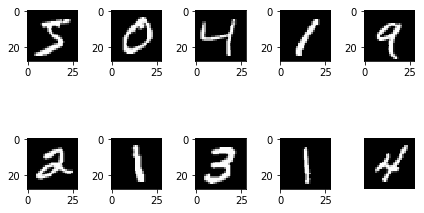

In [8]:
# And you can run that cell if you want to see what the MNIST dataset looks like
ROW = 2
COLUMN = 5
for i in range(ROW * COLUMN):
    # train[i][0] is i-th image data with size 28x28
    image = np.array(training_data[0][i]).reshape(28, 28)   
    plt.subplot(ROW, COLUMN, i+1)          
    plt.imshow(image, cmap='gray')  # cmap='gray' is for black and white picture.
plt.axis('off')  # do not show axis value
plt.tight_layout()   # automatic padding between subplots
plt.show()

<b>Part 1</b>: Build a bigger Neural Network

The input layer of the neural network that you will build contains neurons encoding the values of the input pixels. The training data for the network will consist of many 28 by 28 pixel images of scanned handwritten digits. Thus, the input layer contains 784=28×28 units. The second layer of the network is a hidden layer. We set the number of neurons in the hidden layer to 30. The output layer contains 10 neurons.

<b>Question 2.1.1</b>: Create the network described above using the NeuralNetwork class.

In [9]:
# Define your neural network
mnist_model = NeuralNetwork(784,30,10)

<b>Question 2.1.2</b>: Train your Neural Network on the small subset of MNIST (300 iterations) and print the new accuracy on test data. You will use small_validation_data for validation. Try different learning rates (0.1, 1.0, 10.0). You should use the train() function of the NeuralNetwork class to train your network, and the weights_init() function to reinitialize weights between tests. Print the accuracy of each model on test data using the predict() function.

Training time: 23.333348035812378


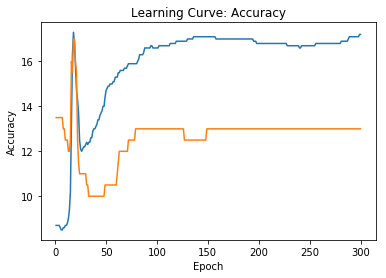

Training time: 23.712209701538086


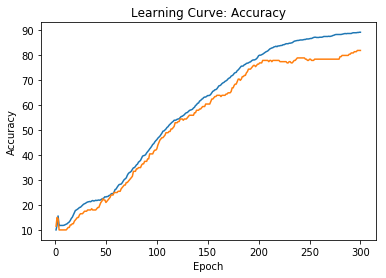

Training time: 24.31537437438965


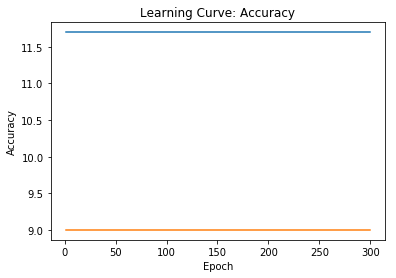

In [10]:
# Train NN and print accuracy on test data
# Learning rate 0.1
mnist_model.weights_init()
mnist_model.train(small_training_data, small_validation_data, 300, 0.1)

# Learning rate 1.
mnist_model.weights_init()
mnist_model.train(small_training_data, small_validation_data, 300, 1)

# Learning rate 10.
mnist_model.weights_init()
mnist_model.train(small_training_data, small_validation_data, 300, 10)

<b>Question 2.1.3</b>: Do the same with 15 and 75 hidden neurons.

Training time: 23.250699281692505


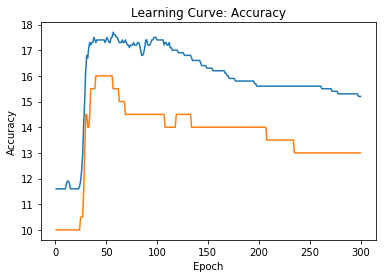

Training time: 23.980042695999146


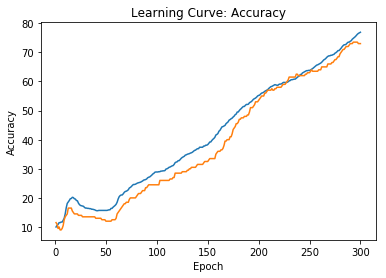

Training time: 22.555487871170044


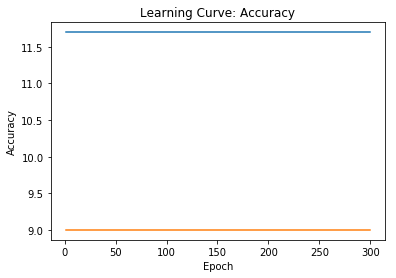

Training time: 27.289550065994263


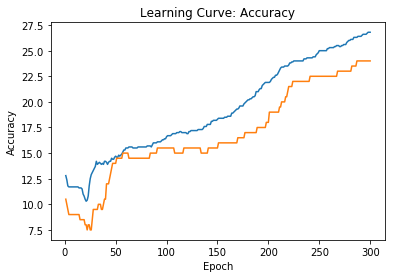

Training time: 27.541895627975464


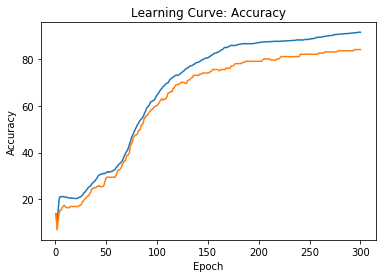

Training time: 26.949780702590942


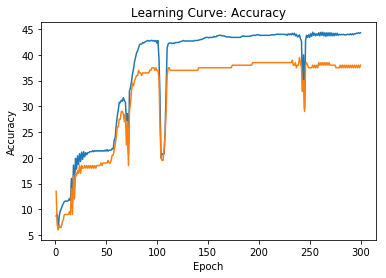

In [11]:
# Define your neural network
mnist_model_15 = NeuralNetwork(784,15,10)
mnist_model_75 = NeuralNetwork(784,75,10)

# 15 hidden neurons 
# Learning rate 0.1
mnist_model_15.weights_init()
mnist_model_15.train(small_training_data, small_validation_data, 300, 0.1)
# Learning rate 1.
mnist_model_15.weights_init()
mnist_model_15.train(small_training_data, small_validation_data, 300, 1)
# Learning rate 10.
mnist_model_15.weights_init()
mnist_model_15.train(small_training_data, small_validation_data, 300, 10)

# 75 hidden neurons
# Learning rate 0.1
mnist_model_75.weights_init()
mnist_model_75.train(small_training_data, small_validation_data, 300, 0.1)
# Learning rate 1.
mnist_model_75.weights_init()
mnist_model_75.train(small_training_data, small_validation_data, 300, 1)
# Learning rate 10.
mnist_model_75.weights_init()
mnist_model_75.train(small_training_data, small_validation_data, 300, 10)

<b>Question 2.1.3</b>: Repeat Questions 2.1.2 and 2.1.3 on the very small datasets. You will use small_validation_data for validation.

Training time: 1.7036449909210205


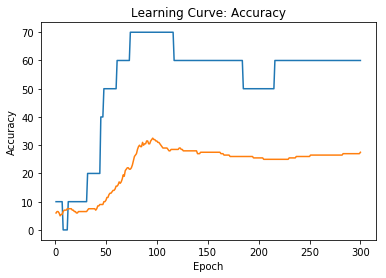

Training time: 1.6327495574951172


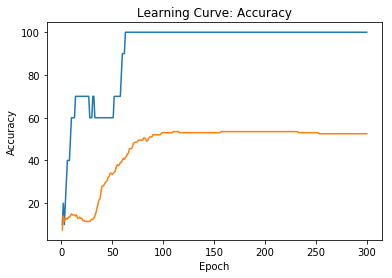

Training time: 1.655576229095459


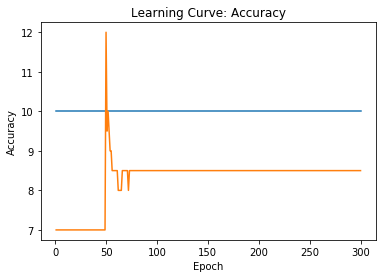

Training time: 1.5601425170898438


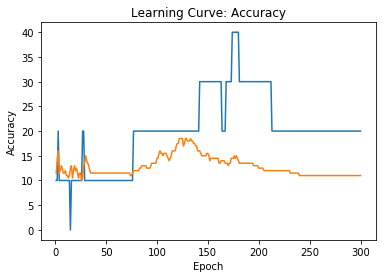

Training time: 1.5807454586029053


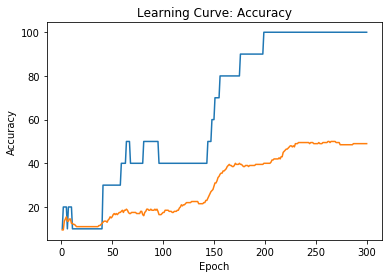

Training time: 1.5978310108184814


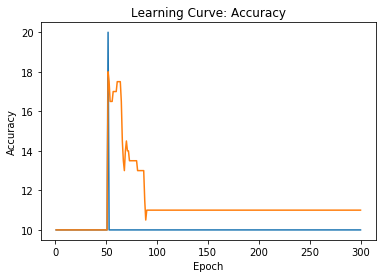

Training time: 1.9253125190734863


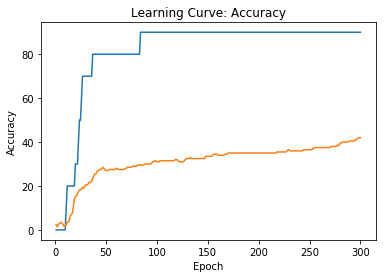

Training time: 1.9345784187316895


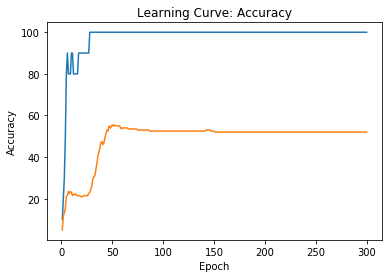

Training time: 1.9335596561431885


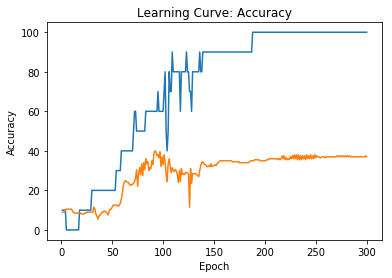

In [12]:
# Train NN and print accuracy on test data
# 30 hidden neurons
# Learning rate 0.1
mnist_model.weights_init()
mnist_model.train(vsmall_training_data, small_validation_data, 300, 0.1)
# Learning rate 1.
mnist_model.weights_init()
mnist_model.train(vsmall_training_data, small_validation_data, 300, 1)
# Learning rate 10.
mnist_model.weights_init()
mnist_model.train(vsmall_training_data, small_validation_data, 300, 10)

# 15 hidden neurons 
# Learning rate 0.1
mnist_model_15.weights_init()
mnist_model_15.train(vsmall_training_data, small_validation_data, 300, 0.1)
# Learning rate 1.
mnist_model_15.weights_init()
mnist_model_15.train(vsmall_training_data, small_validation_data, 300, 1)
# Learning rate 10.
mnist_model_15.weights_init()
mnist_model_15.train(vsmall_training_data, small_validation_data, 300, 10)

# 75 hidden neurons
# Learning rate 0.1
mnist_model_75.weights_init()
mnist_model_75.train(vsmall_training_data, small_validation_data, 300, 0.1)
# Learning rate 1.
mnist_model_75.weights_init()
mnist_model_75.train(vsmall_training_data, small_validation_data, 300, 1)
# Learning rate 10.
mnist_model_75.weights_init()
mnist_model_75.train(vsmall_training_data, small_validation_data, 300, 10)

<b>Question 2.1.5</b>: Explain the results you obtained at Questions 2.1.2, 2.1.3 and 2.1.4.

<div class="alert alert-warning">
  <ul> <p> <li><strong>Number of neurons per layer:</strong> </li> </p>
        <p>Let's start with the network with 15 neurons in the hidden layer. It can be said that it not complex enough for this case. This network shows the worst accuracies on the training set (more or less 10% for learning rate equal to 0.1 and 10), even if it is the fastest one. Surprisingly, on the very small data set and with a learning rate equal to 1, its accuracy on the training is 100% and it generalizes with 50% accuracy (which is as good as the other networks on the very small training dataset).The best results are shown by the most complex network, which is the 75-hidden-neuron network or the 30-hidden-neuron network, with a learning rate equal to 1. With 75 hidden neurons, the network is slower (27sec) than with 30 neurons (23s). </p> 
    <p> <li><strong>Learning rate:</strong> </li> </p>
        <p>1 as learning rate seems to be the best choice for each network. 0,1 seems to be in general the worst learning rate for each network, and it can be explained by the difficulties the network must have to go out of a local minimum. The result with a rate equal to 10 seems to be unstable. Even though 1 is a good choice, it could still be optimized (maybe 1.2 or 0.9 for example).</p>      
    <p> <li><strong>Number of epoch: </strong></li> </p>
        <p>We observe that the accuracy of our neural networks depends on the number of epochs. Indeed, the value of the learning rate influences how fast our neural network will be accurate and that's why, with a small learning rate (0.1), we can observe that the accuracy is increasing with the number of epochs but is still at only 20% in average after 300 epochs. Whereas with a learning rate ten times bigger, the accuracy reaches 70% after 300 epochs. But it can be noticed that the curve is still growing and the accuracy would continue to grow with an higher number of epoch. So with 300 epochs, a learning rate equal to 1 doesn't seem to be enough. But if the network is not complex enough, a big learning rate will overshoot the minimum.  </p>
      <p> <li><strong>Generalization - Overfitting: </strong></li> </p>
      <p> We can first say that the very small data set doesn't allow the networks to generalize. Indeed, even though the training accuracy reachs 100% pretty fast, the maximum validation accuracy remains 50%. However, the small data set seems to quit good on generalization since the validation curve often follows the training curve. Concerning the overfitting, we can't observe some examples, this might be due to the small number of epochs so that our neural network are not overtrained and the validation curve is not decreasing from a certain epoch. </p>
</ul>
        
</div>

<b>Question 2.1.6</b>: Among all the numbers of hidden neurons and learning rates you tried in previous questions, which ones would you expect to achieve best performances on the whole dataset? Justify your answer.

<div class="alert alert-warning"> <p> We decided to choose the 75-hidden-neuron network with a learning rate equal to 1 because it has one of the best accuracy with 300 epochs. Even if it is one of the slowest neural network, we are not really limited in time here, so we should as well aim for the best results possible.</p> </div>

<b>Question 2.1.7</b>: Train a model with the number of hidden neurons and the learning rate you chose in Question 2.1.6 and print its accuracy on the test set. You will use validation_data for validation. Training can be long on the whole dataset (~40 minutes): we suggest that you work on the optional part while waiting for the training to finish.

Training time: 1692.3621821403503


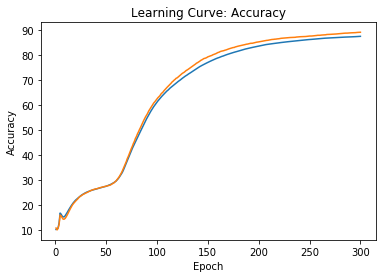

In [18]:
mnist_model = NeuralNetwork(784,75,10)

mnist_model_75.weights_init()
mnist_model_75.train(training_data, validation_data, 300, 1)

<div class="alert alert-warning"> <p> We notice that the neural network accuracy reaches 90% which is the best result we ever had. We can also say that it generalizes very well as the validation curve follows the training curve, probably because we are using a 50 times bigger dataset. But we observe that the curve hasn't reached its maximum and may be we could increase the number of epochs to get the best accuracy. However, the slope is very low, so the improvement may not be worth the effort. </p> </div>

<b>Part 2 (optional)</b>: Another loss function

In classification problems, we usually replace the sigmoids in the output layer by a "softmax" function and the MSE loss by a "cross-entropy" loss. More formally, let $u = (u_1, ..., u_n)$ be the vector representing the activation of the output layer of a Neural Network. The output of that neural network is $o = (o_1, ..., o_n) = \textrm{softmax}(u)$, and

<div align="center">$\textrm{softmax}(u) = (\frac{e^{u_1}}{\sum_{k=1}^n e^{u_k}}, ..., \frac{e^{u_n}}{\sum_{k=1}^n e^{u_k}})$.</div>

If $t = (t_1, ..., t_n)$ is a vector of non-negative targets such that $\sum_{k=1}^n t_k = 1$ (which is the case in classification problems, where one target is equal to 1 and all others are equal to 0), then the cross-entropy loss is defined as follows:

<div align="center">$L_{xe}(o, t) = - \sum_{k=1}^n t_k\log(o_k)$.</div>

<b>Question 2.2.1</b>: Let $L_{xe}$ be the cross-entropy loss function and $u_i$, $i \in \lbrace 1, ..., n \rbrace$, be the activations of the output neurons. Let us assume that the transfer function of the output neurons is the softmax function. Targets are $t_1, ..., t_n$. Derive a formula for $\frac{\partial L_{xe}}{\partial u_i}$ (details of your calculations are not required).

Answer: $\frac{\partial L_{xe}}{\partial u_i} = $${o_i} - {t_i}$ for the output layer


<b>Question 2.2.2</b>: Implement a new feedforward() function and a new backpropagate() function adapted to the cross-entropy loss instead of the MSE loss.

In [14]:
class NeuralNetwork(NeuralNetwork):
    def feedforward_xe(self, inputs):
        transfer_f = self.transfer_f
        inputs = [x + [1.] for x in inputs]
        self.input = np.array(inputs)
        u_1 = np.dot(self.input,self.W_input_to_hidden) # Compute activations for the hidden layer
        self.u_hidden = u_1
        self.o_hidden = np.ones((u_1.shape[0], u_1.shape[1]+1)) # Shape = [batch_size, number_of_hidden_values+1]
        self.o_hidden[:, :-1] = transfer_f(u_1) # Compute output of hidden layer
        u_2 = np.dot(self.o_hidden,self.W_hidden_to_output) # Compute activations for the output layer
        self.u_output = u_2
        self.o_output = transfer_f(u_2)# Compute output of output layer
        

    def backpropagate_xe(self, targets, learning_rate=5.0):
        transfer_df = self.transfer_df
        l = learning_rate
        targets = np.array(targets) # Target outputs
        
        ###CHANGE###
        self.dL_du_output = (self.o_output - targets) # Compute partial derivative of loss with respect to activations of output layer
        
        self.dL_du_hidden =np.dot(self.dL_du_output,self.W_hidden_to_output[:-1,:].T)*transfer_df(self.u_hidden) # Compute partial derivative of loss with respect to activations of hidden layer
        dW_input_to_hidden = np.dot(self.input.T,self.dL_du_hidden)
        dW_hidden_to_output = np.dot(self.o_hidden.T,self.dL_du_output)
        
        # Make updates
        self.W_hidden_to_output -= l*dW_hidden_to_output/len(targets)
        self.W_input_to_hidden -= l*dW_input_to_hidden/len(targets)

<b>Question 2.2.3</b>: Create a new Neural Network with the same architecture as in Question 2.1.1 and train it using the softmax cross-entropy loss.

Training time: 22.076356649398804


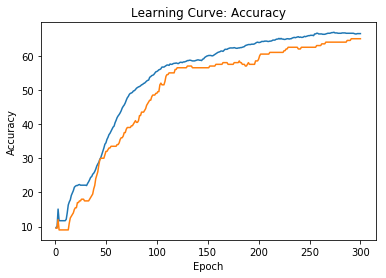

In [16]:
# Define your neural network
mnist_model_xe = NeuralNetwork(784,30,10, softmax)

mnist_model_xe.weights_init()
mnist_model_xe.train_xe(small_training_data, small_validation_data, 300, 1)

# Train NN and print accuracy on validation data

<b>Question 2.2.4</b>: Compare your results with the MSE loss and with the cross-entropy loss.

<div class="alert alert-warning"> <p> Answer: As compared with the same previous network, the performance are not very good. The accuracy reaches hardly 70% when the previous network accuracy reached 80%. Furthermore, the curve is not as smooth but it seems to generalize well. But to really compare the effet of the changes, the network should be optimized as regard to the learning rate at least.   </p> </div>

<div align="center"><b>THE END!</b>